# Data Cleaning and Analysis: The Stanford Open Policing Project

## Data Exploration and Cleaning
 - [Exploring the Dataset](#section1)<br>
 - [Removing Columns](#section2)<br>
 - [Handling Missing Values](#section3)<br>
 - [Column Cleaning](#section4)<br>
 - [Reordering and Renaming Columns](#section5)<br>
 - [The Cleaned Dataset](#section6)<br>

## Data Analysis and Visualization
 - [Data Analysis: Stop Frequency](#section7)<br>
 - [Data Analysis: Speed Related Stops](#section8)<br>
 - [Data Analysis: Outcome Bias](#section9)<br>
 - [Data Analysis: DUI/Drug Stops](#section10)

<a id='section1'></a>
### Exploring the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
mt = pd.read_csv('mt_statewide_2019_08_13.csv', low_memory=False)

In [3]:
mt.head()

,raw_row_number,date,time,location,lat,lng,county_name,subject_age,subject_race,subject_sex,...,search_basis,reason_for_stop,vehicle_make,vehicle_model,vehicle_type,vehicle_registration_state,vehicle_year,raw_Race,raw_Ethnicity,raw_SearchType
0,1,2009-01-01,02:10:53,US 89 N MM10 (SB),47.572738,-111.802932,Cascade County,16.0,white,female,...,NaN,--- - HIT AND RUN,FORD,EXPLORER,SPORT UTILITY,MT,1994.0,W,N,NO SEARCH REQUESTED
1,2,2009-01-02,11:34:19,HWY 93 SO AND ANNS LANE S/B,46.761225,-114.081142,Missoula County,19.0,white,male,...,NaN,EXPIRED TAG ( - MONTHS OR LESS ),GMC,TK,TRUCK,MT,1996.0,W,N,NO SEARCH REQUESTED
2,3,2009-01-03,11:36:42,P007 HWY 93 MM 77 N/B,46.694683,-114.073505,Missoula County,17.0,white,male,...,NaN,SPEED,GMC,YUKON,SPORT UTILITY,MT,1999.0,W,N,NO SEARCH REQUESTED
3,4,2009-01-04,10:33:11,P007 HWY 93 MM 81 S/B,46.727388,-114.079027,Missoula County,17.0,NaN,female,...,NaN,SPEED,HOND,CR-V,SPORT UTILITY,MT,2002.0,W,NaN,NaN
4,5,2009-01-04,10:46:43,P007 HWY 93 MM 81 N/B,46.729518,-114.079150,Missoula County,31.0,NaN,male,...,NaN,SPEED,TOYT,TERCEL,SEDAN,MT,1992.0,I,NaN,NaN


In [4]:
mt.shape

(825118, 29)

In [5]:
mt.dtypes

raw_row_number                  int64
date                           object
time                           object
location                       object
lat                           float64
lng                           float64
county_name                    object
subject_age                   float64
subject_race                   object
subject_sex                    object
department_name                object
type                           object
violation                      object
arrest_made                      bool
citation_issued                  bool
warning_issued                   bool
outcome                        object
frisk_performed                object
search_conducted                 bool
search_basis                   object
reason_for_stop                object
vehicle_make                   object
vehicle_model                  object
vehicle_type                   object
vehicle_registration_state     object
vehicle_year                  float64
raw_Race    

<a id='section2'></a>
### Removing Columns

In [6]:
# removing columns which won't be used for analysis/aggregation purposes
cols_to_drop = [
    'raw_row_number',
    'location',
    'lat',
    'lng',
    'county_name',
    'subject_race',
    'department_name',
    'type',
    'search_basis',
    'vehicle_make',
    'vehicle_model',
    'vehicle_registration_state',
    'raw_Race',
    'raw_Ethnicity',
    'raw_SearchType'
]

mt.drop(cols_to_drop, axis=1, inplace=True)

<a id='section3'></a>
### Handling Missing Values

In [7]:
# missing values as a % of the whole dataset
mt.isna().sum()/len(mt)*100

date                0.001333
time                0.001333
subject_age         0.392186
subject_sex         0.014422
violation           0.008847
arrest_made         0.000000
citation_issued     0.000000
warning_issued      0.000000
outcome             0.030299
frisk_performed     0.011392
search_conducted    0.000000
reason_for_stop     0.001333
vehicle_type        7.921534
vehicle_year        0.953682
dtype: float64

In [8]:
# dropping missing values, >90% of the original dataset will remain 
mt.dropna(inplace=True)

<a id='section4'></a>
### Column Cleaning 

In [9]:
# converting the date and time columns into one column of datetime objects for ease of aggregation
combined = mt.date.str.cat(mt.time, sep=' ')
mt['stop_datetime'] = pd.to_datetime(combined)
mt.drop(['date', 'time'], axis=1, inplace=True)

In [10]:
# converting the age column to type int
mt['subject_age'] = mt.subject_age.astype(int)

In [11]:
# binning the ages into ordinal groups for making nice bar charts
def age_group(age):
    if age >= 10 and age < 20:
        return '10-19'
    elif age >= 20 and age < 30:
        return '20-29'
    elif age >= 30 and age < 40:
        return '30-39'
    elif age >= 40 and age < 50:
        return '40-49'
    elif age >= 50 and age < 60:
        return '50-59'
    elif age >= 60 and age < 70:
        return '60-69'
    elif age >= 70 and age < 80:
        return '70-79'
    elif age >= 80 and age < 90:
        return '80-89'
    elif age >= 90 and age < 100:
        return '90-99'
    else:
        return age

# creating a new age_group column
mt['subject_age_group'] = mt.subject_age.apply(age_group)

In [12]:
# converting the vehicle_year column to type int
mt['vehicle_year'] = mt.vehicle_year.astype(int)

In [13]:
# title-casing the nominal values of the outcome column (only 3 unique values)
mt['outcome'] = mt.outcome.map({'warning': 'Warning', 'citation': 'Citation', 'arrest': 'Arrest'})

In [14]:
# simplifying the gender column to say either M or F
mt['subject_sex'] = mt.subject_sex.map({'male': 'M', 'female': 'F'})

In [15]:
# cleaning up the vehicle_type column
mt.loc[mt.vehicle_type.str.lower().str.contains('truck|pickup'), 'vehicle_type'] = 'PICKUP'
mt.loc[mt.vehicle_type.str.lower().str.contains('sedan'), 'vehicle_type'] = 'SEDAN'
mt.loc[mt.vehicle_type.str.lower().str.contains('sport utility|utility'), 'vehicle_type'] = 'SUV'
mt.loc[mt.vehicle_type.str.lower().str.contains('van'), 'vehicle_type'] = 'VAN'
mt.loc[mt.vehicle_type.str.lower().str.contains('coupe'), 'vehicle_type'] = 'COUPE'
mt.loc[mt.vehicle_type.str.lower().str.contains('motorcycle|motorbike'), 'vehicle_type'] = 'MOTORCYCLE'
mt.loc[mt.vehicle_type.str.lower().str.contains('hatchback'), 'vehicle_type'] = 'HATCHBACK'
mt.loc[mt.vehicle_type.str.lower().str.contains('tractor'), 'vehicle_type'] = 'TRACTOR'
mt.loc[mt.vehicle_type.str.lower().str.contains('wagon'), 'vehicle_type'] = 'WAGON'
mt.loc[~(mt.vehicle_type.str.contains('PICKUP|SEDAN|SUV|VAN|COUPE|MOTORCYCLE|HATCHBACK|TRACTOR|WAGON')), 'vehicle_type'] = 'OTHER'

In [16]:
# viewing the cleaned vehicle_type column
mt.vehicle_type.value_counts()

SEDAN         236758
PICKUP        232723
SUV           157452
VAN            35423
COUPE          26299
WAGON          22685
OTHER          17916
HATCHBACK      10178
TRACTOR         8947
MOTORCYCLE      5593
Name: vehicle_type, dtype: int64

In [17]:
# cleaning up the reason_for_stop column
mt['reason_for_stop'] = mt.reason_for_stop.str.replace('--- - ','')
mt.loc[mt.reason_for_stop.str.lower().str.contains('speed'), 'reason_for_stop'] = 'Speeding'
mt.loc[mt.reason_for_stop.str.lower().str.contains('revoked|license|plate|registration|cmv|inspection|permit|insurance'), 'reason_for_stop'] = 'License/Registration/Plates'
mt.loc[mt.reason_for_stop.str.lower().str.contains('improper|light|violation|stop|driving|right of way|hazard|crossing|too close'), 'reason_for_stop'] = 'Moving Violation'
mt.loc[mt.reason_for_stop.str.lower().str.contains('debris|restrictive|load|defective|equipment|size|weight|height|smoke|exhaust|width|length|container|axle'), 'reason_for_stop'] = 'Equipment'
mt.loc[~(mt.reason_for_stop.str.contains('Speeding|Moving Violation|License/Registration/Plates|Equipment')), 'reason_for_stop'] = 'Other'

In [18]:
# viewing the cleaned reason_for_stop column
mt.reason_for_stop.value_counts()

Speeding                       494983
Moving Violation               149630
License/Registration/Plates     78715
Equipment                       23885
Other                            6761
Name: reason_for_stop, dtype: int64

In [19]:
# creating a boolean column to distinguish if the traffic stop ended in a DUI/Drug violation
mt['drug_dui_stop'] = (mt.violation.str.contains('DUI', regex=False) | mt.violation.str.contains('DRUGS', regex=False))

In [20]:
# cleaning and converting the violation column to contain a list of violations for each driver
mt['violation'] = mt.violation.str.replace(r'\d{3} - ', '', regex=True).str.split('|')

# creating a new column which indicates how many violations the driver committed
mt['num_violations'] = mt.violation.apply(lambda x: len(x))

<a id='section5'></a>
### Reordering and Renaming Columns

In [21]:
# reordering the columns for readability
new_col_order = [
    'stop_datetime',
    'subject_age',
    'subject_age_group',
    'subject_sex',
    'vehicle_type',
    'vehicle_year',
    'reason_for_stop',
    'outcome',
    'violation',
    'num_violations',
    'warning_issued',
    'citation_issued',
    'arrest_made',
    'frisk_performed',
    'search_conducted',
    'drug_dui_stop'
]

mt = mt[new_col_order]

In [22]:
# renaming some columns for readability/my personal preference
column_mapper = {
    'subject_age': 'driver_age',
    'subject_age_group': 'driver_age_group',
    'subject_sex': 'driver_gender',
    'vehicle_make': 'vehicle_brand',
    'reason_for_stop': 'stop_reason'
}

mt.rename(column_mapper, axis=1, inplace=True)

<a id='section6'></a>
### The Cleaned Dataset 

In [23]:
# previewing the cleaned dataset
mt.head()

,stop_datetime,driver_age,driver_age_group,driver_gender,vehicle_type,vehicle_year,stop_reason,outcome,violation,num_violations,warning_issued,citation_issued,arrest_made,frisk_performed,search_conducted,drug_dui_stop
0,2009-01-01 02:10:53,16,10-19,F,SUV,1994,Other,Citation,"[INSURANCE, HIT AND RUN, OTHER NON-HAZARDOUS]",3,True,True,False,False,False,False
1,2009-01-02 11:34:19,19,10-19,M,PICKUP,1996,Other,Arrest,"[EXPIRED TAG ( 4 MONTHS OR LESS ), SEATBELT ( ...",3,True,False,True,False,False,False
2,2009-01-03 11:36:42,17,10-19,M,SUV,1999,Speeding,Arrest,[SPEED],1,False,False,True,False,False,False
6,2009-01-04 17:45:40,30,30-39,M,OTHER,2006,Equipment,Citation,[INSURANCE],1,False,True,False,False,False,False
8,2009-01-06 16:45:12,21,20-29,M,OTHER,1992,Speeding,Citation,[SPEED OVER LEGAL],1,False,True,False,False,False,False


In [24]:
# 750,000+ of the original 825,118 rows remain
# 16 of the original 29 columns remain
mt.shape

(753974, 16)

In [25]:
print('{:.2f}% of the original dataset remains after data cleaning.'.format((mt.shape[0]/825118)*100))

91.38% of the original dataset remains after data cleaning.


<a id='section7'></a>
### Data Analysis: Stop Frequency

### Is the number of stops increasing each year?

''

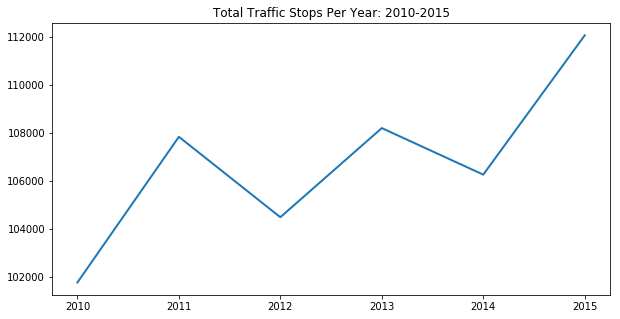

In [88]:
# using 2010-2015 to answer the first question. The data for 2009 and 2016 is incomplete
# because data collection only began at the end of 2009 and 2016 is not finished yet
mt_2009_2015 = mt[mt.stop_datetime.dt.year.isin([2010, 2011, 2012, 2013, 2014, 2015])].copy()
fig, ax = plt.subplots(figsize=(10,5))
mt_2009_2015.stop_datetime.dt.year.value_counts().sort_index().plot(linewidth=2)
plt.title('Total Traffic Stops Per Year: 2010-2015')
;

### On which day of the week do most stops occur?

In [90]:
new_index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mt.stop_datetime.dt.weekday_name.value_counts().reindex(index=new_index)*100

Monday        9914700
Tuesday       9176600
Wednesday     9775600
Thursday     10549300
Friday       11865000
Saturday     12437800
Sunday       11678400
Name: stop_datetime, dtype: int64

''

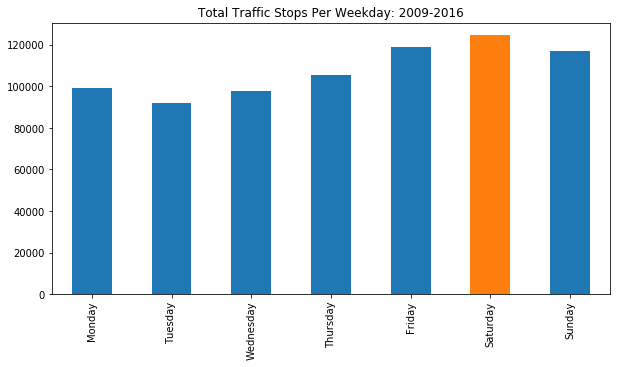

In [91]:
blue = '#1f77b4'
orange = '#ff7f0e'
fig, ax = plt.subplots(figsize=(10,5))
mt.stop_datetime.dt.weekday_name.value_counts().reindex(index=new_index).plot(kind='bar', color=[blue,blue,blue,blue,blue,orange,blue])
plt.title('Total Traffic Stops Per Weekday: 2009-2016')
;

### What time of day do most stops occur?

In [79]:
mt.stop_datetime.dt.hour.value_counts()

15    69466
16    62360
14    58858
17    52207
18    51019
8     43613
10    43367
13    42038
9     41601
19    38400
11    36886
20    33263
12    31774
21    31416
7     30026
22    29071
23    23387
0     13538
1      9410
2      5649
6      4800
5       982
3       636
4       207
Name: stop_datetime, dtype: int64

''

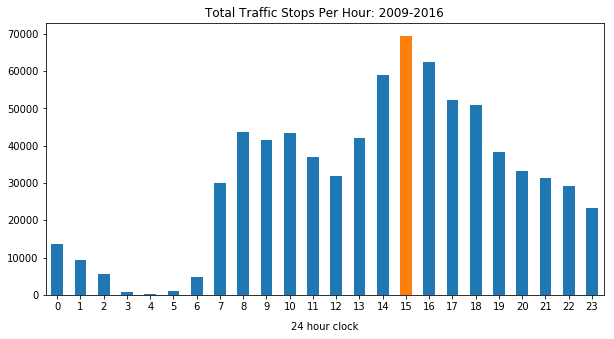

In [92]:
fig, ax = plt.subplots(figsize=(10,5))
mt.stop_datetime.dt.hour.value_counts().sort_index().plot(kind='bar', rot=0, color=[blue,blue,blue,blue,blue,blue,blue,blue,blue,blue,blue,blue,blue,blue,blue,orange,blue,blue,blue,blue,blue,blue,blue,blue])
plt.title('Total Traffic Stops Per Hour: 2009-2016')
plt.xlabel('24 hour clock', labelpad=10)
;

### What is the driver age/gender distribution for all traffic stops?

In [66]:
mt.driver_gender.value_counts()

M    509898
F    244076
Name: driver_gender, dtype: int64

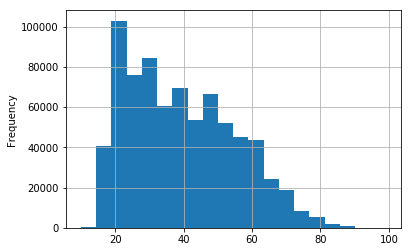

In [119]:
mt.driver_age.plot(kind='hist', bins=20, grid=True)

''

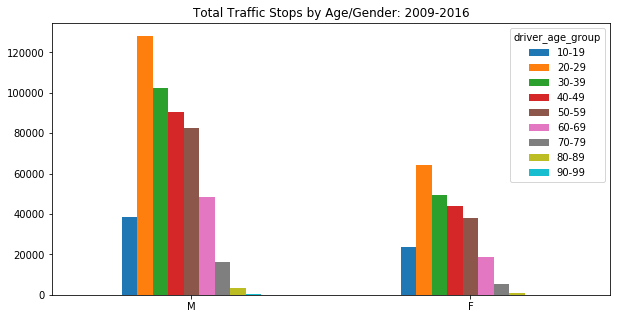

In [109]:
fig, ax = plt.subplots(figsize=(10,5))
mt.groupby('driver_gender').driver_age_group.value_counts().unstack().sort_index(ascending=False).plot(kind='bar', ax=ax, rot=0, colormap='tab10')
plt.title('Total Traffic Stops by Age/Gender: 2009-2016')
plt.xlabel('')
;

In [117]:
mt.groupby('driver_gender').driver_age_group.value_counts(normalize=True).sort_index(ascending=[False, True])

driver_gender  driver_age_group
M              10-19               0.075743
               20-29               0.251244
               30-39               0.200387
               40-49               0.176961
               50-59               0.161681
               60-69               0.094703
               70-79               0.032002
               80-89               0.006862
               90-99               0.000416
F              10-19               0.096109
               20-29               0.263229
               30-39               0.203117
               40-49               0.179813
               50-59               0.154915
               60-69               0.076001
               70-79               0.022292
               80-89               0.004347
               90-99               0.000176
Name: driver_age_group, dtype: float64

<a id='section8'></a>
### Data Analysis: Speed Related Stops

 - __Do men or women speed more often?__<br>
 - __Do people in trucks speed more often than other types of cars?__<br>
 - __Do people speed more in older cars?__<br>
 - __Do teens and young adults speed the most?__

<a id='section9'></a>
### Data Analysis: Outcome Bias

 - __Does gender or age affect who gets a warning vs. citation?__<br>
 - __Does gender or age affect who gets searched?__<br>
 - __During a search - does gender/age affect who gets frisked?__

<a id='section10'></a>
### Data Analysis: DUI/Drug Stops

 - __Do most drug/dui stops occur because of moving violations?__<br>
 - __Do most drug/dui stops occur at night?__<br>
 - __Do most drug/dui stops occur on the weekend?__<br>
 - __Do most drug/dui stops involve male drivers?__